# Imports

In [2]:
from random import randint
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Load DATA

In [3]:
operational_settings = ['op_setting_{}'.format(i + 1) for i in range (3)]
sensor_columns = ['sensor_{}'.format(i + 1) for i in range(27)]
features = operational_settings + sensor_columns
metadata = ['engine_no', 'time_in_cycles']
list_columns = metadata + features

df_train = pd.read_csv('https://raw.githubusercontent.com/sayyed-uoft/TSSA/main/train_FD001.txt', sep=' ', 
                       header=None, names=list_columns)

In [4]:
df_train

,engine_no,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388,100.0,39.06,23.4190,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388,100.0,39.00,23.4236,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388,100.0,38.95,23.3442,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388,100.0,38.88,23.3739,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388,100.0,38.90,23.4044,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388,100.0,38.49,22.9735,NaN,NaN,NaN,NaN,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388,100.0,38.30,23.1594,NaN,NaN,NaN,NaN,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388,100.0,38.44,22.9333,NaN,NaN,NaN,NaN,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388,100.0,38.29,23.0640,NaN,NaN,NaN,NaN,NaN,NaN


# Calculate RUL (Remaining Useful Life)

In [5]:
def add_rul(g):
    g['RUL'] = [max(g['time_in_cycles'])] * len(g)
    g['RUL'] = g['RUL'] - g['time_in_cycles']
    del g['engine_no']
    return g.reset_index()

df_train = df_train.groupby('engine_no').apply(add_rul).reset_index()
del df_train['level_1']

In [6]:
df_train

,engine_no,index,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,...,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,RUL
0,1,0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,...,100.0,39.06,23.4190,NaN,NaN,NaN,NaN,NaN,NaN,191
1,1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,...,100.0,39.00,23.4236,NaN,NaN,NaN,NaN,NaN,NaN,190
2,1,2,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,...,100.0,38.95,23.3442,NaN,NaN,NaN,NaN,NaN,NaN,189
3,1,3,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,...,100.0,38.88,23.3739,NaN,NaN,NaN,NaN,NaN,NaN,188
4,1,4,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,...,100.0,38.90,23.4044,NaN,NaN,NaN,NaN,NaN,NaN,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,20626,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,...,100.0,38.49,22.9735,NaN,NaN,NaN,NaN,NaN,NaN,4
20627,100,20627,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,...,100.0,38.30,23.1594,NaN,NaN,NaN,NaN,NaN,NaN,3
20628,100,20628,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,...,100.0,38.44,22.9333,NaN,NaN,NaN,NaN,NaN,NaN,2
20629,100,20629,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,...,100.0,38.29,23.0640,NaN,NaN,NaN,NaN,NaN,NaN,1


In [8]:
df = df_train.copy()

# Data Analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   engine_no       20631 non-null  int64  
 1   index           20631 non-null  int64  
 2   time_in_cycles  20631 non-null  int64  
 3   op_setting_1    20631 non-null  float64
 4   op_setting_2    20631 non-null  float64
 5   op_setting_3    20631 non-null  float64
 6   sensor_1        20631 non-null  float64
 7   sensor_2        20631 non-null  float64
 8   sensor_3        20631 non-null  float64
 9   sensor_4        20631 non-null  float64
 10  sensor_5        20631 non-null  float64
 11  sensor_6        20631 non-null  float64
 12  sensor_7        20631 non-null  float64
 13  sensor_8        20631 non-null  float64
 14  sensor_9        20631 non-null  float64
 15  sensor_10       20631 non-null  float64
 16  sensor_11       20631 non-null  float64
 17  sensor_12       20631 non-null 

In [10]:
df.describe()

,engine_no,index,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,...,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,RUL
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,...,20631.0,20631.000000,20631.000000,0.0,0.0,0.0,0.0,0.0,0.0,20631.000000
mean,51.506568,10315.000000,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,...,100.0,38.816271,23.289705,NaN,NaN,NaN,NaN,NaN,NaN,107.807862
std,29.227633,5955.801038,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,...,0.0,0.180746,0.108251,NaN,NaN,NaN,NaN,NaN,NaN,68.880990
min,1.000000,0.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,...,100.0,38.140000,22.894200,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,26.000000,5157.500000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,...,100.0,38.700000,23.221800,NaN,NaN,NaN,NaN,NaN,NaN,51.000000
50%,52.000000,10315.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,...,100.0,38.830000,23.297900,NaN,NaN,NaN,NaN,NaN,NaN,103.000000
75%,77.000000,15472.500000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,...,100.0,38.950000,23.366800,NaN,NaN,NaN,NaN,NaN,NaN,155.000000
max,100.000000,20630.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,...,100.0,39.430000,23.618400,NaN,NaN,NaN,NaN,NaN,NaN,361.000000


### Find columns that can be droped 

In [11]:
nan_column = df.columns[df.isna().any()].tolist()
const_columns = [c for c in df.columns if len(df[c].drop_duplicates()) <= 2]
print('Columns with all nan: \n' + str(nan_column) + '\n')
print('Columns with all const values: \n' + str(const_columns) + '\n')

Columns with all nan: 
['sensor_22', 'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27']

Columns with all const values: 
['op_setting_3', 'sensor_1', 'sensor_5', 'sensor_6', 'sensor_10', 'sensor_16', 'sensor_18', 'sensor_19', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27']



# Making a prediction

### Splitting train / validation data

In [12]:
number_of_engine_no = len(df['engine_no'].drop_duplicates())

engine_no_val = range(50, 70)
engine_no_train = [x for x in range(number_of_engine_no) if x not in engine_no_val]

### Selecting only relevant features

In [15]:
selected_features = [x for x in features if x not in nan_column + const_columns]
selected_features

['op_setting_1',
 'op_setting_2',
 'sensor_2',
 'sensor_3',
 'sensor_4',
 'sensor_7',
 'sensor_8',
 'sensor_9',
 'sensor_11',
 'sensor_12',
 'sensor_13',
 'sensor_14',
 'sensor_15',
 'sensor_17',
 'sensor_20',
 'sensor_21']

### Actually making the split

In [16]:
data_train = df[df['engine_no'].isin(engine_no_train)]
data_val = df[df['engine_no'].isin(engine_no_val)]

X_train, y_train = data_train[selected_features], data_train['RUL'] 
X_val, y_val = data_val[selected_features], data_val['RUL']

In [17]:
X_train

,op_setting_1,op_setting_2,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21
0,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20426,-0.0015,-0.0001,643.72,1600.39,1428.03,551.09,2388.27,9054.88,48.23,519.60,2388.29,8123.55,8.4885,396,38.50,23.0425
20427,-0.0027,-0.0003,643.52,1605.33,1430.32,551.61,2388.26,9063.31,48.16,519.32,2388.27,8130.99,8.5124,393,38.39,22.9674
20428,-0.0031,-0.0003,643.96,1606.95,1427.90,550.86,2388.32,9055.80,48.48,519.69,2388.31,8126.90,8.5374,395,38.57,23.1440
20429,-0.0010,-0.0001,644.10,1600.20,1436.54,551.51,2388.29,9060.79,48.12,519.84,2388.33,8125.66,8.5592,395,38.45,23.0478


In [18]:
y_train

0        191
1        190
2        189
3        188
4        187
        ... 
20426      4
20427      3
20428      2
20429      1
20430      0
Name: RUL, Length: 16149, dtype: int64

### Training a linear model

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Make prediction on training and validation data

In [21]:
y_train_pred = lr.predict(X_train)
y_val_pred = lr.predict(X_val)

### Calculate error on training and validation data

In [22]:
from sklearn.metrics import mean_squared_error
print('RMSE on Training: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print('RMSE on Validation: {:.2f}'.format(np.sqrt(mean_squared_error(y_val, y_val_pred))))

RMSE on Training: 41.88
RMSE on Validation: 54.82


### Plot absolute error against true value

Text(0, 0.5, 'Absolute Error')

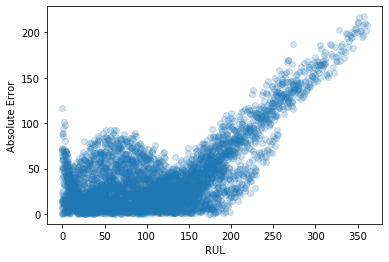

In [24]:
y_val_error = np.abs(y_val - y_val_pred)
plt.scatter(y_val, y_val_error, alpha=0.2)
plt.xlabel("RUL")
plt.ylabel("Absolute Error")

### Training a random forest

In [25]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Make prediction on training and validation data

In [26]:
y_train_pred = rf_reg.predict(X_train)
y_val_pred = rf_reg.predict(X_val)

### Calculate error on training and validation data

In [27]:
from sklearn.metrics import mean_squared_error
print('RMSE on Training: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print('RMSE on Validation: {:.2f}'.format(np.sqrt(mean_squared_error(y_val, y_val_pred))))

RMSE on Training: 14.26
RMSE on Validation: 54.33


### Plot absolute error against true value

Text(0, 0.5, 'Absolute Error')

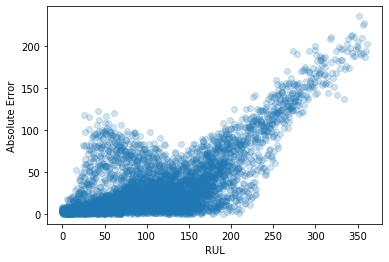

In [28]:
y_val_error = np.abs(y_val - y_val_pred)
plt.scatter(y_val, y_val_error, alpha=0.2)
plt.xlabel("RUL")
plt.ylabel("Absolute Error")